In [9]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from ipywidgets import interactive

Loading the IMLS data.

In [10]:
grant_data = pd.read_csv('Administrative_Discretionary_Grants__FY_1996-2014_.csv', encoding = 'iso-8859-1')
grant_data

,Log Number,Institution,Program,Program Type,Project Title,Project Type,Award Date,Address,Address 2,Address 3,...,County Code,Census Tract,Census Block,MCD Code,Place Code,CBSA Code,MSAD Code,Description,Location,Organizational Unit Location
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 648,NaN,NaN,...,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN,"P.O. Box 648\nUnalaska, AK 99685-0648\n",NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 681420,NaN,NaN,...,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN,"P.O. Box 681420\nFort Payne, AL 35967\n",NaN
2,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"P.O. Box 613\nSuperior, AZ 85273-0613\n",NaN
3,IA-00-00-0008-00,Coachella Valley Historical Society,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 595,NaN,NaN,...,65.0,45207.0,1000.0,90520.0,36448.0,40140.0,NaN,NaN,"P.O. Box 595\nIndio, CA 92201\n",NaN
4,IA-00-00-0009-00,Los Gatos Museum,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 1904,NaN,NaN,...,85.0,507001.0,2059.0,92830.0,44112.0,41940.0,NaN,NaN,"P.O. Box 1904\nLos Gatos, CA 95031\n",NaN
5,IA-00-00-0010-00,Gold Nugget Museum,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 949,NaN,NaN,...,7.0,1900.0,3002.0,92380.0,55520.0,17020.0,NaN,NaN,"P.O. Box 949\nParadise, CA 95967\n",NaN
6,IA-00-00-0011-00,Kimberly Crest House and Gardens,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 206,NaN,NaN,...,71.0,8301.0,2011.0,92770.0,59962.0,40140.0,NaN,NaN,"P.O. Box 206\nRedlands, CA 92373\n",NaN
7,IA-00-00-0013-00,Los Angeles Maritime Museum,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,Berth 84,Foot of 6th Street,NaN,...,37.0,296902.0,1007.0,91750.0,44000.0,31080.0,31084.0,NaN,"Berth 84\nSan Pedro, CA 90731\n",NaN
8,IA-00-00-0015-00,Santa Ynez Valley Historical Society,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 181,NaN,NaN,...,83.0,1905.0,3041.0,93065.0,NaN,42200.0,NaN,NaN,"P.O. Box 181\nSanta Ynez, CA 93460\n",NaN
9,IA-00-00-0019-00,Guilford Keeping Society,Conservation Assessment Prog.,IA,NaN,NaN,03/30/2000 12:00:00 AM,P.O. Box 363,NaN,NaN,...,9.0,190301.0,2004.0,34950.0,NaN,35300.0,NaN,NaN,"P.O. Box 363\nGuilford, CT 06437\n",NaN


In [11]:
grant_data.columns
grant_data['Requested Award Amount'] = grant_data['Requested Award Amount'].str.slice(1).astype(float)

In [12]:
grant_data['Total Amount Awarded and Disbursed'] = grant_data['Total Amount Awarded and Disbursed'].str.slice(1).astype(float)

In the next two cells I am coverting the 'Requested Award Amount' and 'Total Amount Awarded and Disbursed' as float type and removing the dollar sign from them to perform operations on them.

In [13]:
grant_data.columns
grant_data['Requested Award Amount'] = grant_data['Requested Award Amount'].str.slice(1).astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [16]:
grant_data['Total Amount Awarded and Disbursed'] = grant_data['Total Amount Awarded and Disbursed'].str.slice(1).astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

Subsetting the data here, taking only those values that have 'Requested Award Amount' > 'Total Amount Awarded and Disbursed'.

In [17]:
new_data = grant_data[(grant_data['Requested Award Amount']>grant_data['Total Amount Awarded and Disbursed'])]

Creating a function to return the data on the basis of state selection.

In [18]:
def eq_state(state='AL'):
    return new_data[grant_data['State'] == state]

Creatina a dropdown for different values of states.

In [19]:
widgets.Dropdown(
    options= np.unique(new_data['State']).tolist(),
    value='IL',
    description='Number:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)
value = eq_state('CO')

C:\Users\trive\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Creating a stack plot for 'COLORADO' show the difference between 'Requested Award Amount' and 'Total Amount Awarded and Disbursed' over a time period of 18 years

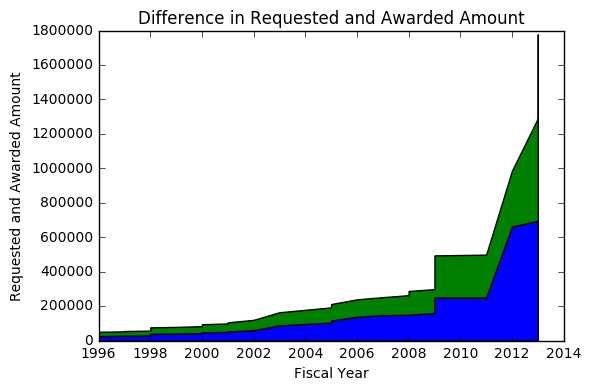

In [20]:
plt.stackplot(np.sort(value['Fiscal Year']), np.sort(value['Requested Award Amount']), np.sort(value['Total Amount Awarded and Disbursed']))
#plt.plot(np.sort(value['Fiscal Year']), np.sort(value['Requested Award Amount']), '--r')
#plt.plot(np.sort(value['Fiscal Year']), np.sort(value['Total Amount Awarded and Disbursed']), '--')
plt.xlabel('Fiscal Year')
plt.ylabel('Requested and Awarded Amount')
plt.title('Difference in Requested and Awarded Amount')
plt.show()

Taking the unique values of states from the dataset.

In [21]:
state = np.unique(new_data['State']).tolist()
state

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'FM',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

Creating items to feed in states value in the dropdown.

In [22]:
#interact(eq_state('AL'), x=state);
items = sorted(new_data['State'].unique().tolist())
items

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'FM',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

Creating an interactive stack plot for 'States' of United States, showing the difference between 'Requested Award Amount' and 'Total Amount Awarded and Disbursed' over a time period of 18 years

C:\Users\trive\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


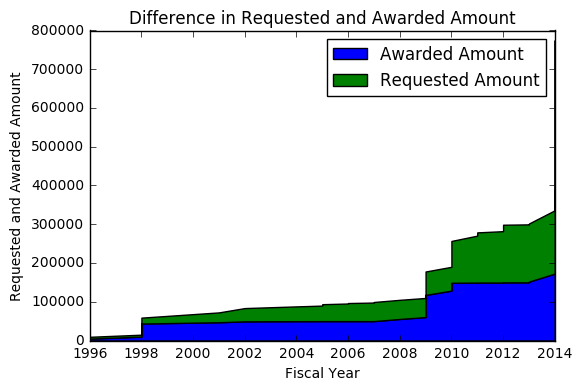

In [23]:
def view(x=''):
    value = eq_state(x)
    plt.stackplot(np.sort(value['Fiscal Year']), np.sort(value['Requested Award Amount']), np.sort(value['Total Amount Awarded and Disbursed']))
    plt.xlabel('Fiscal Year')
    plt.ylabel('Requested and Awarded Amount')
    plt.title('Difference in Requested and Awarded Amount')
    plt.legend(['Awarded Amount', 'Requested Amount'])
    return plt.show()
 
w = widgets.Dropdown(options=items)
interactive(view, x=w)

The above plot shows the difference between the requested and the awarded amount to different states over the time period of eighteen years. The requested amount and the awarded amount shown are for different instituions within a state.
